In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv('churn.csv')

***Exploratory Data Analysis***


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [75]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


replacing blanks with 0 as tenure is 0, and no total charges are recorded.

In [76]:
print(df.isnull().sum())
print(df.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [77]:
df['TotalCharges'] = df['TotalCharges'].replace(' ',0)
df['TotalCharges']  = df['TotalCharges'].astype('float')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [79]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [80]:
df.duplicated().sum()

np.int64(0)

To convert 0 and 1 values to 'yes' or 'no' in seniorcitizen coulumn to make it easy understanding.

In [81]:
def conv(values):
  if values == 1:
    return 'yes'
  else:
    return 'no'

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)


#another way to change and  we can also use replace function
#df['SeniorCitizen'].df['SeniorCitizen'].map({1 : 'yes', 0 : 'no'})

In [82]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


<function matplotlib.pyplot.show(close=None, block=None)>

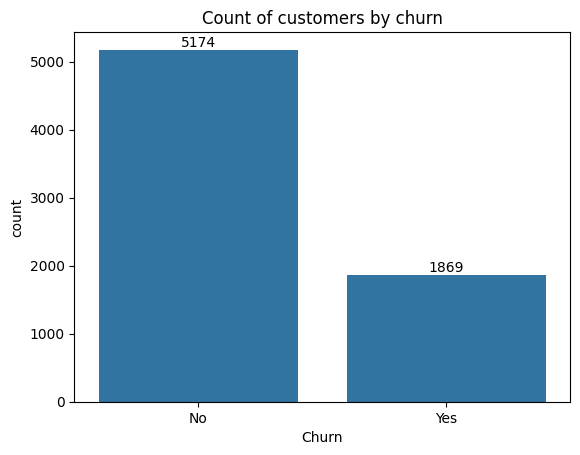

In [83]:
ax = sns.countplot( x = 'Churn', data=df)
ax.bar_label(ax.containers[0])
plt.title('Count of customers by churn')
plt.show

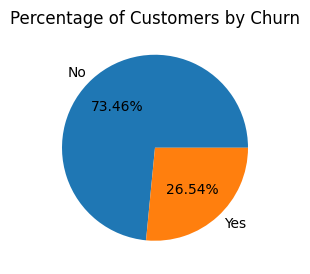

In [84]:
plt.figure(figsize = (3,4))
gb = df.groupby('Churn').agg({'Churn':'count'})
plt.title('Percentage of Customers by Churn')
plt.pie(gb['Churn'], labels = gb.index, autopct='%1.2f%%')
plt.show()

In [85]:
#from the given pie chart we can conclude that 26.54% customers are churned out

In [86]:
#exploring the reasons behind it

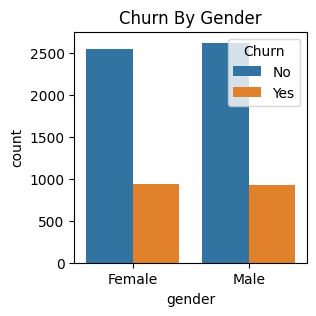

In [94]:
 plt.figure(figsize = (3,3))
 sns.countplot(x = 'gender', data = df, hue = 'Churn')
 plt.title('Churn By Gender')
 plt.show()

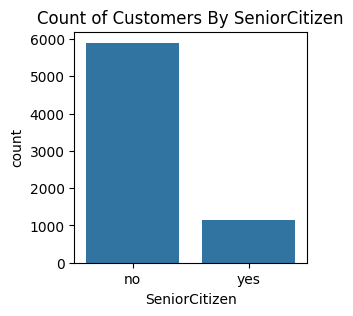

In [101]:
 plt.figure(figsize = (3,3))
 sns.countplot(x = 'SeniorCitizen', data = df)
 ax.bar_label(ax.containers[0])
 plt.title('Count of Customers By SeniorCitizen')
 plt.show()

In [97]:
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100
print(ct)

Churn                 No        Yes
SeniorCitizen                      
no             76.393832  23.606168
yes            58.318739  41.681261


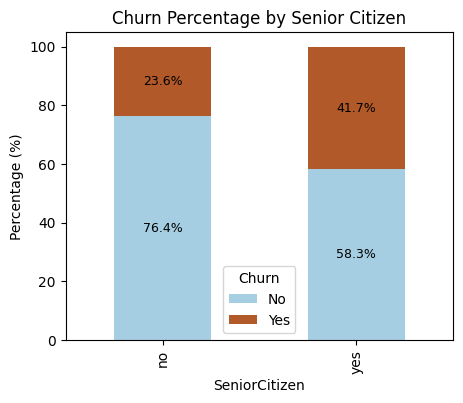

In [99]:
ax = ct.plot(kind='bar', stacked=True, figsize=(5,4), colormap='Paired')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:   # avoid 0% labels
        ax.text(x + width/2, y + height/2, f'{height:.1f}%',
                ha='center', va='center', color='black', fontsize=9)

plt.ylabel("Percentage (%)")
plt.title("Churn Percentage by Senior Citizen")
plt.legend(title="Churn")
plt.show()


In [102]:
#comparitive a greater percentage of people in senior cetizen category have churned out

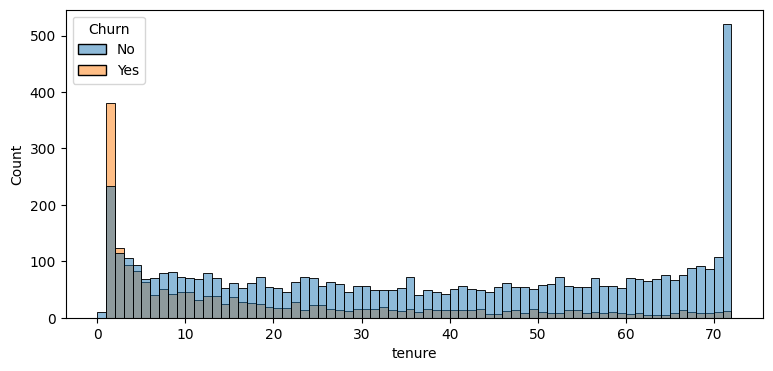

In [110]:
plt.figure(figsize = (9,4))
sns.histplot(x = 'tenure',data =df, bins = 72, hue = 'Churn')
plt.show()

people who have used our servies for long has stayed and who used for 1 month or two month are churned


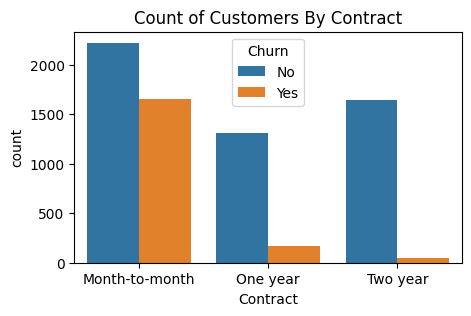

In [119]:
 plt.figure(figsize = (5,3))
 sns.countplot(x = 'Contract', data = df, hue = 'Churn')
 ax.bar_label(ax.containers[0])
 plt.title('Count of Customers By Contract')
 plt.show()

people who have month to month contract are likely to churn then from who have 1 or 2 year contract

In [120]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

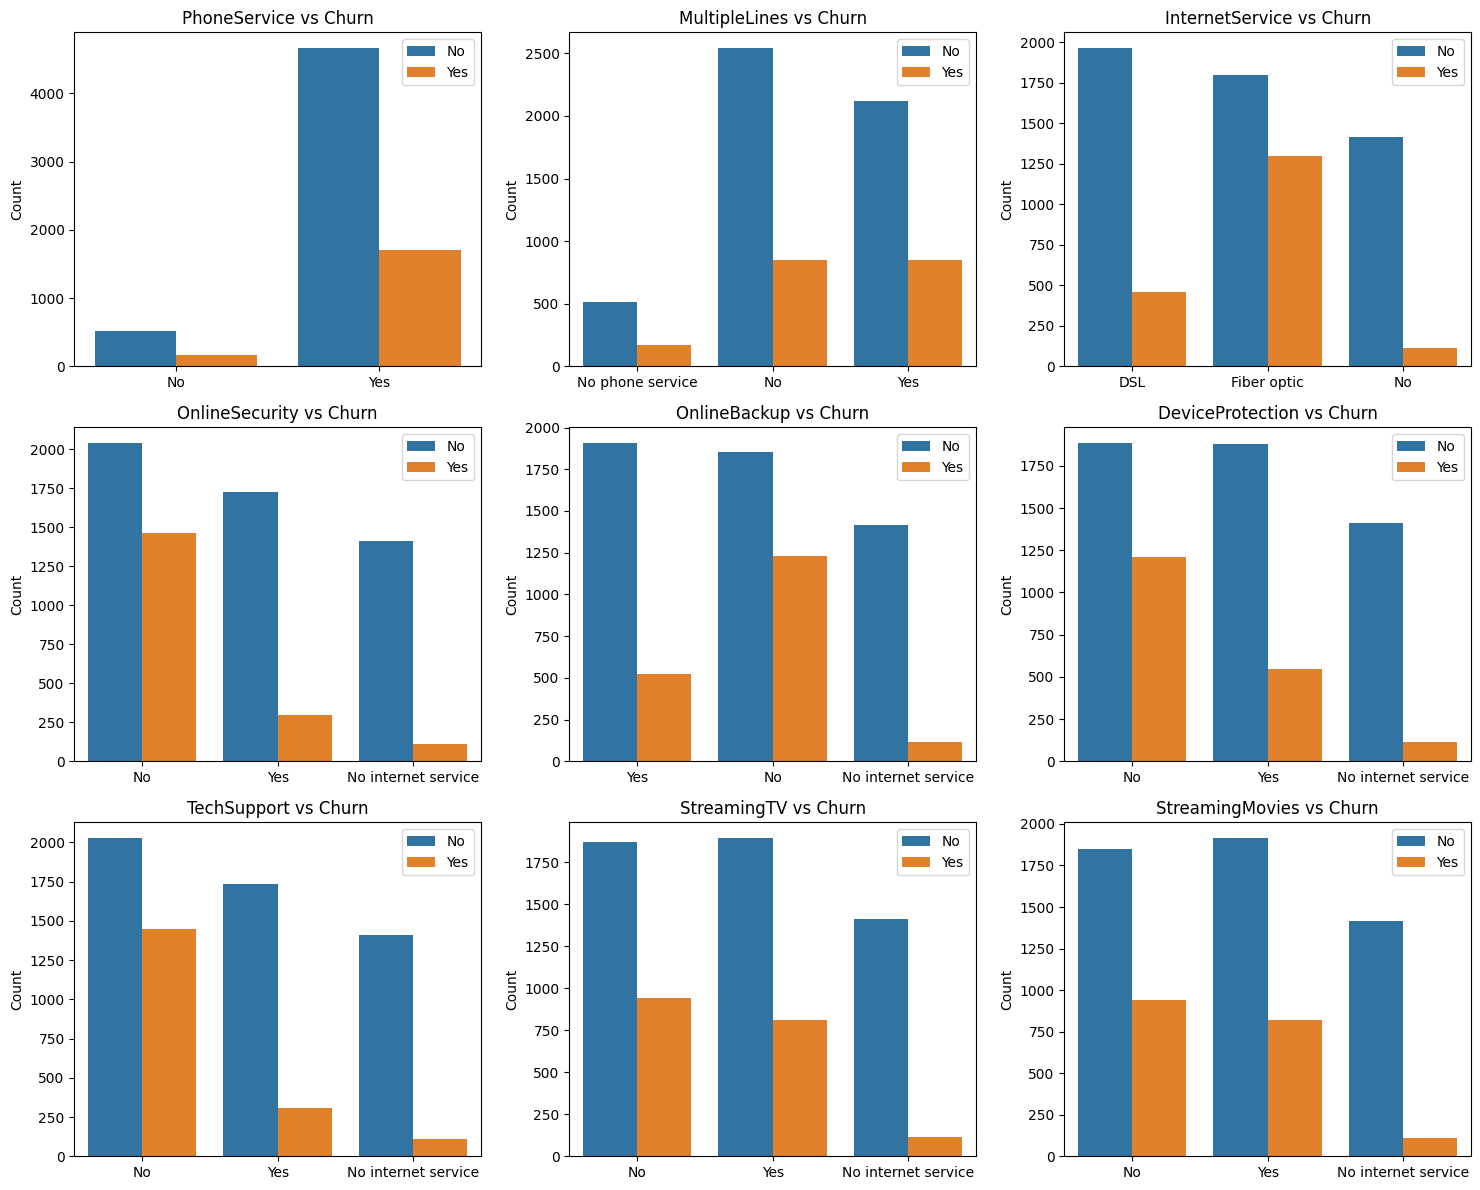

In [122]:

# Columns you want to plot
service_cols = ['PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the figure size and number of subplots
n_cols = 3  # number of columns in subplot grid
n_rows = (len(service_cols) + n_cols - 1) // n_cols  # auto rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
axes = axes.flatten()  # flatten for easy indexing

# Loop through columns and create countplots
for i, col in enumerate(service_cols):
    sns.countplot(x=col, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Churn')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].legend(loc='upper right')

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


customers with Fiber optic internet and those lacking add-on services like OnlineSecurity, TechSupport, and DeviceProtection have a much higher churn rate compared to others. Customers with no internet service generally show lower churn. Overall, churn is more strongly associated with the absence of protective/retention-oriented services

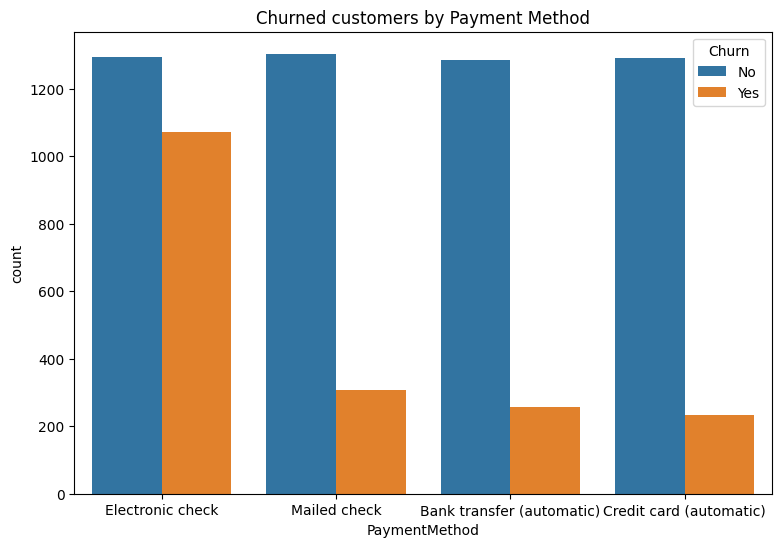

In [127]:
 plt.figure(figsize = (9,6))
 sns.countplot(x = 'PaymentMethod', data = df, hue = 'Churn')
 ax.bar_label(ax.containers[0])
 ax.bar_label(ax.containers[1])
 plt.title('Churned customers by Payment Method')
 plt.show()

Customer is likely to churn when he is using electronic check as a payment method